## Question 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from utils import styled_print, download_data, read_and_clean_data, \
     plot_scatter_plot

### Section B - Unsupervised Machine Learning

In [3]:
cleveland_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [4]:
headers = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "target"
}

In [5]:
styled_print(f"Heart Disease Data Analysis", header=True)
styled_print(f"Extracting Data From {cleveland_url}")
cleveland_file = download_data(cleveland_url, path_to_download="./data")
cleveland_df = read_and_clean_data(cleveland_file, header=headers.values())

› Heart Disease Data Analysis
    Extracting Data From http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


In [6]:
styled_print(f"Cleveland Dataframe Info", header=True)
cleveland_df.info()

› Cleveland Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
categorical_columns = ["cp", "restecg", "slope", "thal", "ca"]
binary_columns = ["sex", "fbs", "exang"]

continuous_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
discrete_columns = categorical_columns + binary_columns
target_column = ["target"]

In [8]:
og_data_df = cleveland_df.copy()
og_data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
og_data_df = og_data_df.dropna()
og_data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data_df = og_data_df.drop(target_column[0], axis=1)

In [11]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_df), columns = data_df.columns)
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220


In [12]:
# Function to create Cluster Map for Better Visualization and Filtering
def create_cluster_map(data, model):
    cluster_map = pd.DataFrame()
    cluster_map['ClusterID'] = model.labels_
    cluster_map = pd.concat([data, cluster_map], axis=1)
    return cluster_map

def get_centroid(data, kmeans):
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
    return centroids

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0, init='random', n_init='auto').fit(data_scaled)
cluster_map = create_cluster_map(og_data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Random Cluster Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Random Cluster Initialization", header=True)
print(get_centroid(data_df, kmeans).head(10))

› Cluster Map from Kmeans with Random Cluster Initialization
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  target  ClusterID  
0    3.0  0.0   6.0     0.0        4.0  
1    2.0 

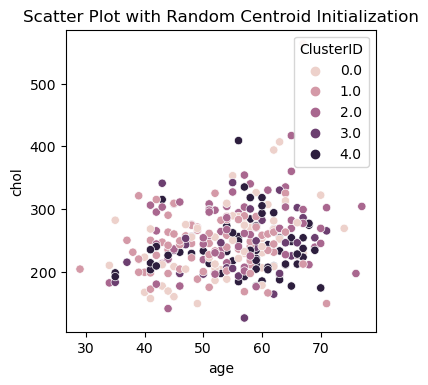

In [14]:
plot_scatter_plot(
    df=cluster_map, 
    x="age", 
    y="chol", 
    hue='ClusterID',
    title="Scatter Plot with Random Centroid Initialization", 
    figsize=(4, 4), 
    dpi=100)

When we us k=5, we don't see andy clear patterns. Let's try to visualize each cluster along with target variable.

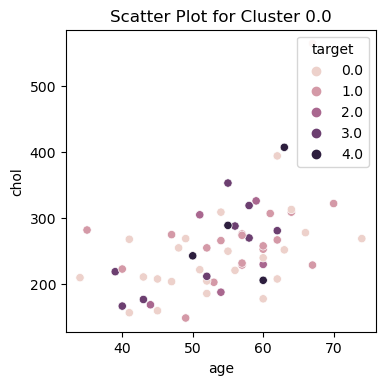

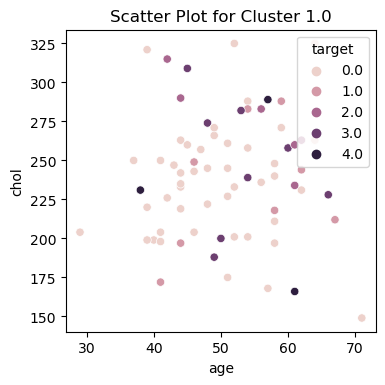

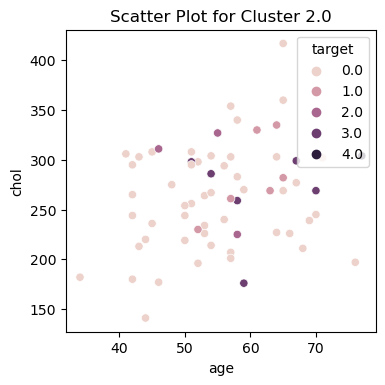

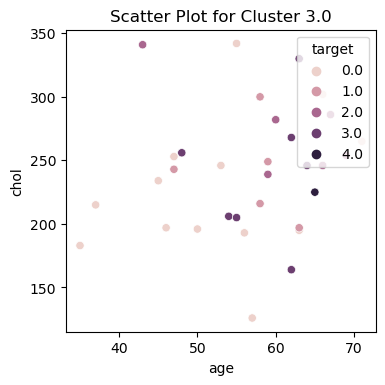

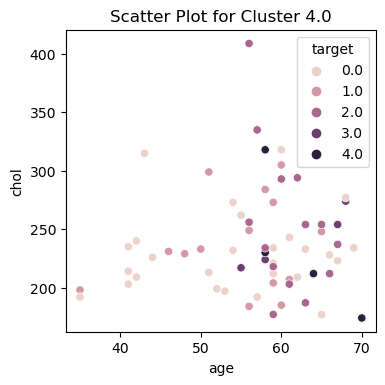

In [15]:
grouped = cluster_map.groupby('ClusterID')
for name, group in grouped:
    plot_scatter_plot(
        df=group, 
        x="age", 
        y="chol", 
        hue='target',
        title=f"Scatter Plot for Cluster {name}", 
        figsize=(4, 4), 
        dpi=100
    )

**Observations**
- Cluster 0 - Most of the samples are in the range of 40-60 years of age and has significantly higher number of heart dieses patients.
- Cluster 4 - Most of the samples are in the range of 50-70 years of age and has significantly higher number of heart dieses patients.  
- Cluster 1 and 2 - Most of the samples are of non-heart dieses patients. 

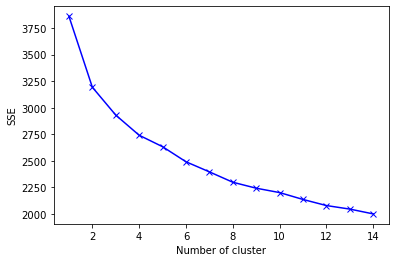

In [16]:
sse = {} 
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=0, init='random', n_init='auto').fit(data_scaled)
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

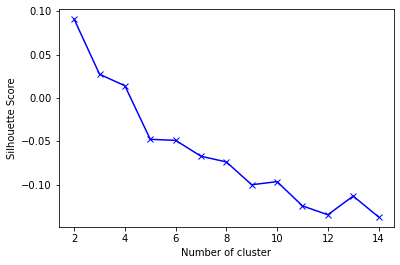

In [17]:
sc = {} 
for k in range(2, 15):
    kmeans = KMeans(n_init='auto', n_clusters=k, init='random', random_state=0).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_df, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

k = 2 has significantly higher amount of silhouette score. Let's use k=2 for clustering. 

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0, init='random', n_init='auto').fit(data_scaled)
cluster_map = create_cluster_map(og_data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Random Cluster Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Random Cluster Initialization", header=True)
print(get_centroid(data_df, kmeans).head(10))

› Cluster Map from Kmeans with Random Cluster Initialization
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  target  ClusterID  
0    3.0  0.0   6.0     0.0        0.0  
1    2.0 

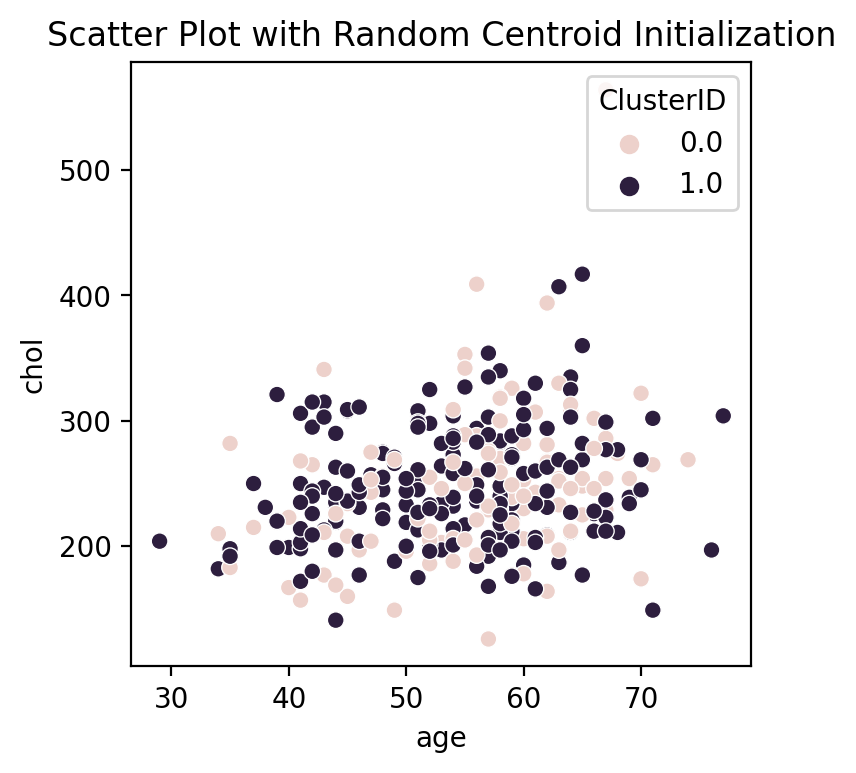

In [19]:
plot_scatter_plot(
    df=cluster_map, 
    x="age", 
    y="chol", 
    hue='ClusterID',
    title="Scatter Plot with Random Centroid Initialization", 
    figsize=(4, 4), 
    dpi=200)

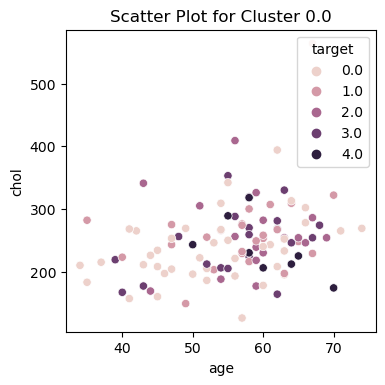

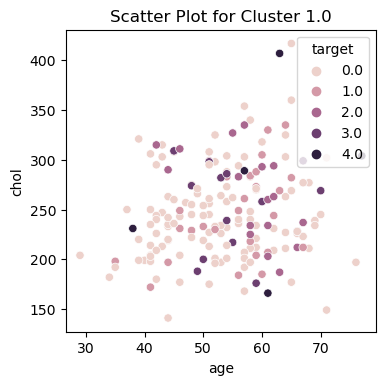

In [20]:
grouped = cluster_map.groupby('ClusterID')
for name, group in grouped:
    plot_scatter_plot(
        df=group, 
        x="age", 
        y="chol", 
        hue='target',
        title=f"Scatter Plot for Cluster {name}", 
        figsize=(4, 4), 
        dpi=100
    )

**Observations**

- Cluster 0 has mostly patient with high severity of heart dieses. Large number of samples in this group are very dark in color which indicates target label 2, 3 and 4. 
- Cluster 1 contains lower severity of samples. 

- Using clustering helps us to see that instead of 5 categories in targets, if we choose 2 categories in target variable, it would be much better distribution of data. 
- Using only `age` and `chol` might not be good enough features. That means that other features are also very important and useful to predict the heart dieses.  